# Importing Libraries

In [5]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import squarify
from sklearn.linear_model import LinearRegression

# Sraping Data

In [6]:
# https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv

url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
data = requests.get(url).text
soup = bs(data, 'lxml')

strs = soup.find('p').text.split('\n')
covid = pd.DataFrame((sub.split(',') for sub in strs[1:]), columns = strs[0].split(','))
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0,0,,0,0,,...,,37.75,0.5,64.83,0.51,41128772,,,,
1,AFG,Asia,Afghanistan,2020-01-06,0,0,,0,0,,...,,37.75,0.5,64.83,0.51,41128772,,,,
2,AFG,Asia,Afghanistan,2020-01-07,0,0,,0,0,,...,,37.75,0.5,64.83,0.51,41128772,,,,
3,AFG,Asia,Afghanistan,2020-01-08,0,0,,0,0,,...,,37.75,0.5,64.83,0.51,41128772,,,,
4,AFG,Asia,Afghanistan,2020-01-09,0,0,,0,0,,...,,37.75,0.5,64.83,0.51,41128772,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426552,ZWE,Africa,Zimbabwe,2024-07-25,266386,0,0.14,5740,0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,,,,
426553,ZWE,Africa,Zimbabwe,2024-07-26,266386,0,0.14,5740,0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,,,,
426554,ZWE,Africa,Zimbabwe,2024-07-27,266386,0,0.14,5740,0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,,,,
426555,ZWE,Africa,Zimbabwe,2024-07-28,266386,0,0.0,5740,0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,,,,


# Data Cleaning
First I'm checking if there are duplicate data.

In [7]:
covid[covid.duplicated() == True]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


Next, I'm going to impute the empty strings with 0 (assuming they're empty because there is, for example no new deaths at that day) and remove the last row (which contains None). I'm also changing the location column into country.

In [8]:
covid.replace({'' : 0, np.nan : 0, None : 0}, inplace = True)
covid.rename(columns = {'location' : 'country'}, inplace = True)
covid = covid[covid['country'] != 0]
covid

,iso_code,continent,country,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0,0,0,0,0,0,...,0,37.75,0.5,64.83,0.51,41128772,0,0,0,0
1,AFG,Asia,Afghanistan,2020-01-06,0,0,0,0,0,0,...,0,37.75,0.5,64.83,0.51,41128772,0,0,0,0
2,AFG,Asia,Afghanistan,2020-01-07,0,0,0,0,0,0,...,0,37.75,0.5,64.83,0.51,41128772,0,0,0,0
3,AFG,Asia,Afghanistan,2020-01-08,0,0,0,0,0,0,...,0,37.75,0.5,64.83,0.51,41128772,0,0,0,0
4,AFG,Asia,Afghanistan,2020-01-09,0,0,0,0,0,0,...,0,37.75,0.5,64.83,0.51,41128772,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426551,ZWE,Africa,Zimbabwe,2024-07-24,266386,0,0.14,5740,0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,0,0,0,0
426552,ZWE,Africa,Zimbabwe,2024-07-25,266386,0,0.14,5740,0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,0,0,0,0
426553,ZWE,Africa,Zimbabwe,2024-07-26,266386,0,0.14,5740,0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,0,0,0,0
426554,ZWE,Africa,Zimbabwe,2024-07-27,266386,0,0.14,5740,0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,0,0,0,0


I'm checking the columns.

In [9]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426556 entries, 0 to 426555
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   iso_code                                    426556 non-null  object
 1   continent                                   426556 non-null  object
 2   country                                     426556 non-null  object
 3   date                                        426556 non-null  object
 4   total_cases                                 426556 non-null  object
 5   new_cases                                   426556 non-null  object
 6   new_cases_smoothed                          426556 non-null  object
 7   total_deaths                                426556 non-null  object
 8   new_deaths                                  426556 non-null  object
 9   new_deaths_smoothed                         426556 non-null  object
 10  total_ca

Removing the columns that I don't need, mostly are per million and weekly.

In [10]:
covid.drop(
        [
            'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate',
            'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
            'weekly_hosp_admissions_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed_per_thousand',
            'tests_per_case', 'tests_units', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 
            'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million',
            'new_people_vaccinated_smoothed_per_hundred' , 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', 'excess_mortality',
            'excess_mortality_cumulative_per_million', 'new_people_vaccinated_smoothed', 'iso_code', 'total_deaths_per_million',
            'total_deaths_per_million', 'new_deaths_per_million', 'hospital_beds_per_thousand'
    ], axis = 1, inplace = True
)

C:\Users\arnol\AppData\Local\Temp\ipykernel_10716\2662488787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid.drop(


All of the columns are object type, I'm going to convert the numerical columns into float and the date colum into datetime.

In [11]:
numerical_cols = list(covid.columns[3:])
covid[numerical_cols] = covid[numerical_cols].apply(pd.to_numeric)

covid['date'] = pd.to_datetime(covid['date'])

C:\Users\arnol\AppData\Local\Temp\ipykernel_10716\3370196910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid[numerical_cols] = covid[numerical_cols].apply(pd.to_numeric)
C:\Users\arnol\AppData\Local\Temp\ipykernel_10716\3370196910.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['date'] = pd.to_datetime(covid['date'])


In [12]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426556 entries, 0 to 426555
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   continent                  426556 non-null  object        
 1   country                    426556 non-null  object        
 2   date                       426556 non-null  datetime64[ns]
 3   total_cases                426556 non-null  int64         
 4   new_cases                  426556 non-null  int64         
 5   new_cases_smoothed         426556 non-null  float64       
 6   total_deaths               426556 non-null  int64         
 7   new_deaths                 426556 non-null  int64         
 8   new_deaths_smoothed        426556 non-null  float64       
 9   icu_patients               426556 non-null  int64         
 10  hosp_patients              426556 non-null  int64         
 11  total_tests                426556 non-null  int64   

I'm going to check the basic statistical details about the dataframe first

In [13]:
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,total_tests,new_tests,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index,population
count,4.265560e+05,4.265560e+05,4.265560e+05,4.265560e+05,426556.000000,426556.000000,426556.000000,426556.000000,4.265560e+05,4.265560e+05,...,426556.000000,426556.000000,426556.000000,426556.000000,426556.000000,426556.000000,426556.000000,426556.000000,426556.000000,4.265560e+05
mean,7.056639e+06,7.708771e+03,7.708270e+03,7.796541e+04,69.155635,69.148849,60.612342,372.836779,3.927805e+06,1.189415e+04,...,14493.576003,6.892420,203.211080,6.910603,6.217893,18.844149,19.126986,67.169241,0.538163,1.527348e+08
std,4.381853e+07,2.252127e+05,8.482271e+04,4.322352e+05,1342.566689,503.387539,675.415939,3249.412869,3.719872e+07,1.072733e+05,...,19116.226699,15.745093,153.876876,5.571046,9.755033,19.439292,31.421458,22.104484,0.340057,6.993900e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01
25%,3.904000e+03,0.000000e+00,0.000000e+00,2.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,926.000000,0.000000,92.240000,2.420000,0.000000,0.000000,0.000000,66.320000,0.000000,5.332930e+05
50%,5.106200e+04,0.000000e+00,8.860000e+00,6.700000e+02,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,6570.100000,0.000000,204.300000,6.410000,1.000000,16.600000,0.000000,74.080000,0.660000,6.336393e+06
75%,6.733085e+05,0.000000e+00,2.688600e+02,8.750000e+03,0.000000,2.710000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,21490.940000,2.500000,298.240000,10.080000,7.700000,34.800000,25.380000,78.920000,0.810000,3.296952e+07
max,7.758294e+08,4.423623e+07,6.319461e+06,7.056095e+06,103719.000000,14817.000000,28891.000000,154497.000000,9.214000e+09,3.585563e+07,...,116935.600000,77.600000,724.420000,30.530000,44.000000,78.100000,100.000000,86.750000,0.960000,7.975105e+09


# Exploratory Data Analysis and Data Visualization
## Difference Between Original and Smoothed Data
There appears to be columns with their smoothed data. I'm checking how different is the smoothed data from the original.

In [15]:
# Making a dictionary of columns to be aggregated
aggs = {
    'total_cases' : max,
    'new_cases_smoothed' : sum,
    'total_tests' : max,
    'new_tests_smoothed' : sum,
    'total_deaths' : max,
    'new_deaths_smoothed' : sum,
    'total_vaccinations' : max,
    'new_vaccinations_smoothed' : sum
}


# The sum of aggregated new smoothed columns become the total smoothed
cols = {
    'new_cases_smoothed' : 'total_cases_smoothed',
    'new_tests_smoothed' : 'total_tests_smoothed',
    'new_deaths_smoothed' : 'total_deaths_smoothed',
    'new_vaccinations_smoothed' : 'total_vaccinations_smoothed'
}

diff = covid.groupby(['continent', 'country']).agg(aggs)

diff.drop(0, inplace = True)
diff.reset_index(inplace = True)
diff.rename(columns = cols, inplace = True)


# Calculating the percentage difference between the original and smoothed
diff['cases'] = abs(diff['total_cases'] - diff['total_cases_smoothed'])/diff['total_cases']*100
diff['tests'] = abs(diff['total_tests'] - diff['total_tests_smoothed'])/diff['total_tests']*100
diff['deaths'] = abs(diff['total_deaths'] - diff['total_deaths_smoothed'])/diff['total_deaths']*100
diff['vacs'] = abs(diff['total_vaccinations'] - diff['total_vaccinations_smoothed'])/diff['total_vaccinations']*100
diff.replace(float('inf'), np.nan, inplace = True)

# Showing the cases part
diff[['country', 'total_cases', 'total_cases_smoothed', 'cases']].sort_values(by = 'cases', ascending = False)

,country,total_cases,total_cases_smoothed,cases
34,Mayotte,42027,42902.23,2.082542
93,Philippines,4173631,4205461.75,0.762663
16,Equatorial Guinea,17130,17227.91,0.571570
218,Northern Mariana Islands,14881,14843.77,0.250185
32,Mauritania,63872,63996.10,0.194295
...,...,...,...,...
120,England,0,0.00,NaN
146,Northern Ireland,0,0.00,NaN
153,Scotland,0,0.00,NaN
163,Wales,0,0.00,NaN


I'm going to turn the data into visualizations using a combination of matplotlib and seaborn

Text(0.5, 1.0, 'Vacs')

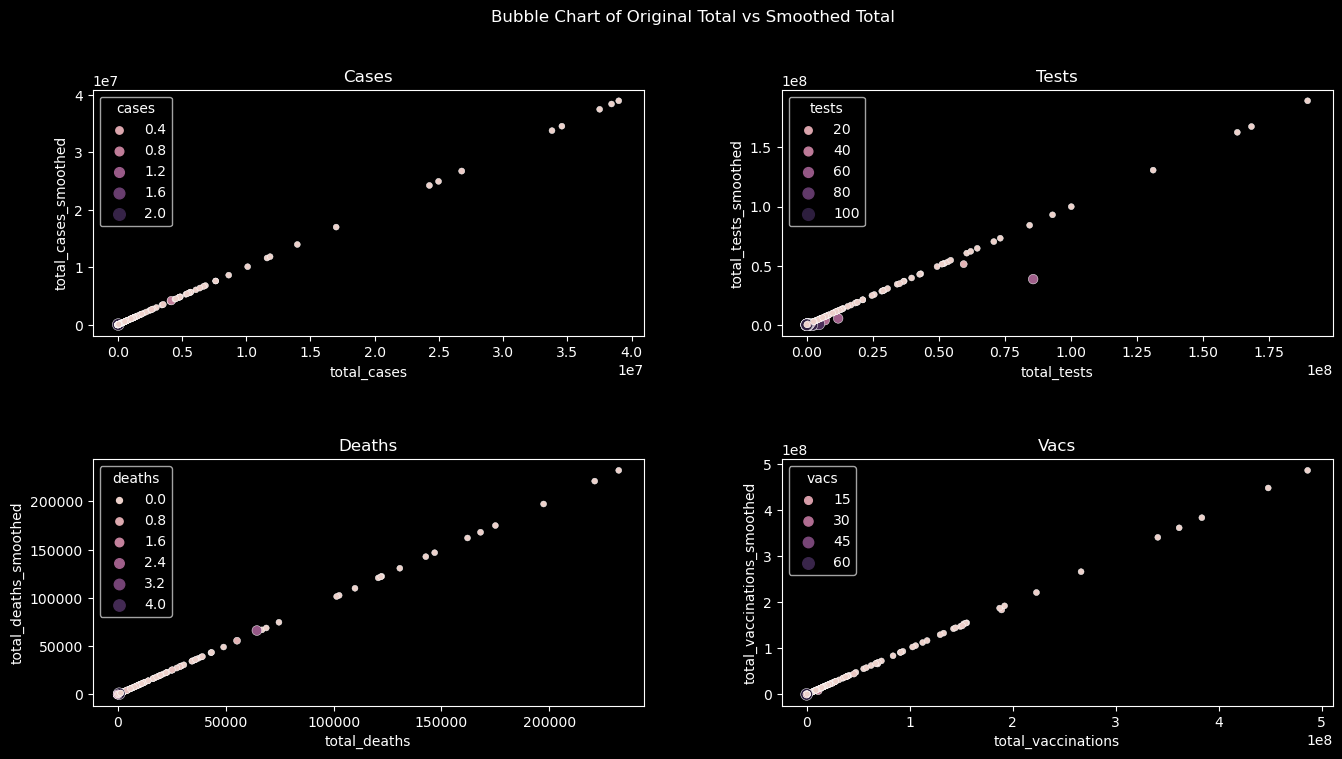

In [27]:
%matplotlib inline
plt.style.use("dark_background")

# < 14000000
# < 200000000
# < 50000000

# Creating the figure and main title
fig, axes = plt.subplots(2, 2, figsize = (16, 8))
fig.subplots_adjust(hspace = 0.5, wspace = 0.25)
fig.suptitle('Bubble Chart of Original Total vs Smoothed Total')
              
# Creating the subplots of bubble chart
# I'm also excluding the data points that are too far from the rest of the data to get a closer view of the majority of the points
sns.scatterplot(ax = axes[0,0], data = diff[diff['total_cases'] < 40000000], x = 'total_cases', y = 'total_cases_smoothed',
                hue = 'cases', size = 'cases')
axes[0,0].set_title('Cases')

sns.scatterplot(ax = axes[0,1], data = diff[diff['total_tests'] < 200000000], x = 'total_tests', y = 'total_tests_smoothed',
                hue = 'tests', size = 'tests')
axes[0,1].set_title('Tests')

sns.scatterplot(ax = axes[1,0], data = diff[diff['total_deaths'] < 300000], x = 'total_deaths', y = 'total_deaths_smoothed',
                hue = 'deaths', size = 'deaths')
axes[1,0].set_title('Deaths')

sns.scatterplot(ax = axes[1,1], data = diff[diff['total_vaccinations'] < 500000000], x = 'total_vaccinations',
                y = 'total_vaccinations_smoothed', hue = 'vacs', size = 'vacs')
axes[1,1].set_title('Vacs')


From the graphs above, the cases and vaccinations seems to be almost linear and most of the bubbles size are small. This means that the smoothed data of total cases and total vaccinations aren't that far off from the original. The deaths and tests on the other hand have a few outliers and there are visible huge bubbles on the tests graph, meaning there is a huge difference between the smoothed and the original data.


Let's check the coefficient of determination (R-squared) between the smoothed and original using linear regression. I'm using the new columns instead of the total because it's more accurate

In [28]:
def regression(column):
    X = np.array(covid[column]).reshape(-1,1)  # Creating the X and y
    y = np.array(covid[column + '_smoothed'])

    lr = LinearRegression()  # Making the regression model
    lr.fit(X, y)  # Fitting the X and y into the model
    r2 = lr.score(X, y)  # Calculate the r-squared
    
    return r2

print('R-squared of cases:', regression('new_cases'))
print('R-squared of tests:', regression('new_tests'))
print('R-squared of deaths:', regression('new_deaths'))
print('R-squared of vaccinations:', regression('new_vaccinations'))

def regressions(column):
    X = np.array(diff[column]).reshape(-1,1)  # Creating the X and y
    y = np.array(diff[column + '_smoothed'])

    lr = LinearRegression()  # Making the regression model
    lr.fit(X, y)  # Fitting the X and y into the model
    r2 = lr.score(X, y)  # Calculate the r-squared
    
    return r2

print('R-squared of cases:', regressions('total_cases'))
print('R-squared of tests:', regressions('total_tests'))
print('R-squared of deaths:', regressions('total_deaths'))
print('R-squared of vaccinations:', regressions('total_vaccinations'))

R-squared of cases: 0.14185294746778887
R-squared of tests: 0.018052830016936028
R-squared of deaths: 0.14058318567533967
R-squared of vaccinations: 0.9646495209226622
R-squared of cases: 0.9999999583322041
R-squared of tests: 0.9999659730815103
R-squared of deaths: 0.9999988621298072
R-squared of vaccinations: 0.9999968470706322


In [15]:
regression('new_deaths')

0.9520143940477932

In [29]:
# Cases
X = np.array(covid['new_cases']).reshape(-1,1)  # Creating the X and y
y = np.array(covid['new_cases_smoothed'])

cases_lr = LinearRegression()  # Making the regression model
cases_lr.fit(X, y)  # Fitting the X and y into the model
cases_r2 = cases_lr.score(X, y)  # Calculate the r-squared

print('R2 of cases:', cases_r2)


# Tests
X = np.array(covid['new_tests']).reshape(-1,1)
y = np.array(covid['new_tests_smoothed'])

tests_lr = LinearRegression()
tests_lr.fit(X, y)
tests_r2 = cases_lr.score(X, y)

print('R2 of tests:', tests_r2)


# Deaths
X = np.array(covid['new_deaths']).reshape(-1,1)
y = np.array(covid['new_deaths_smoothed'])

deaths_lr = LinearRegression()
deaths_lr.fit(X, y)
deaths_r2 = cases_lr.score(X, y)

print('R2 of deaths:', deaths_r2)

# Vaccinations
X = np.array(covid['new_vaccinations']).reshape(-1,1)
y = np.array(covid['new_vaccinations_smoothed'])

vaccinations_lr = LinearRegression()
vaccinations_lr.fit(X, y)
vaccinations_r2 = cases_lr.score(X, y)

print('R2 of vaccinations:', vaccinations_r2)

R2 of cases: 0.14185294746778887
R2 of tests: 0.004336219125117502
R2 of deaths: -169.44817756239462
R2 of vaccinations: 0.2555841967121758


As seen from above, both total cases and total vaccinations have quite high coefficient while total tests and total deaths have quite low coefficient

## Column Aggregation Over a Time Period
I'm aggregating a column over a time period and turn them into a line chart. For example 'Highest new_deaths of Each Month in United States'.

C:\Users\arnol\AppData\Local\Temp\ipykernel_10716\2323777902.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['day'] =  pd.DatetimeIndex(covid['date']).day
C:\Users\arnol\AppData\Local\Temp\ipykernel_10716\2323777902.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['month'] =  pd.DatetimeIndex(covid['date']).month
C:\Users\arnol\AppData\Local\Temp\ipykernel_10716\2323777902.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

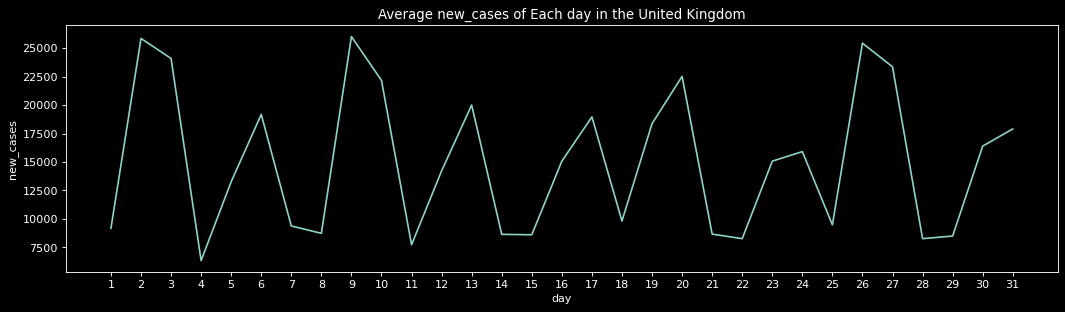

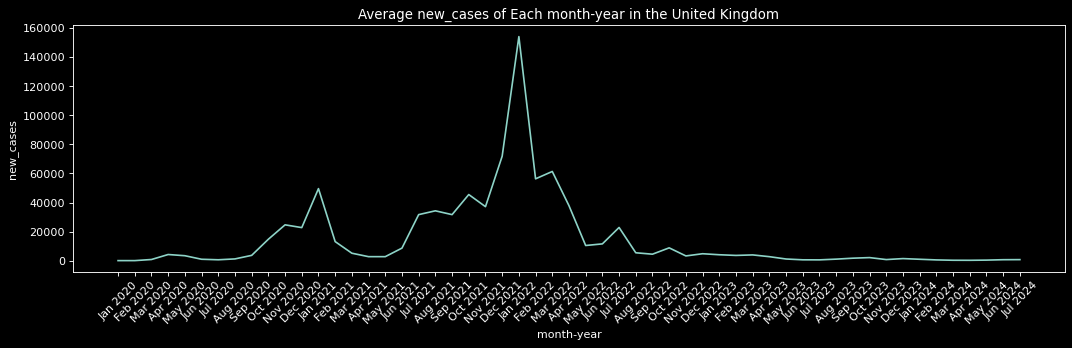

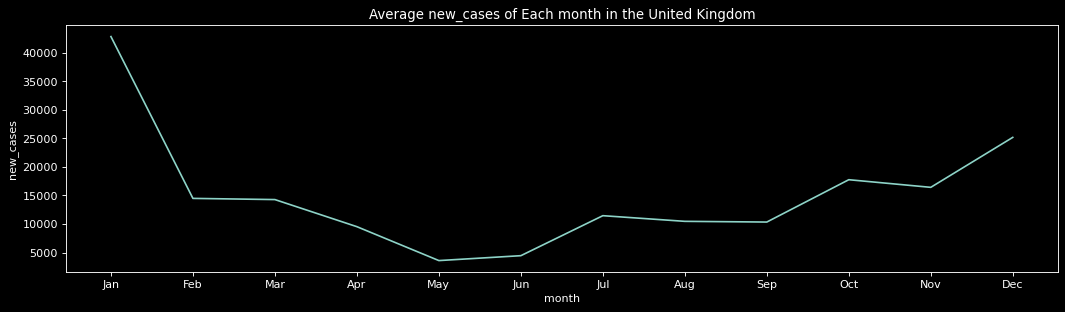

In [30]:
# Setting the location, period, column and aggregation
location = 'country'  # country or continent
location_name = 'United Kingdom'  # name of country/continent
timelines = ['day', 'month-year', 'month']  # year (2020-2022), month (Jan - Dec), day (1-31) or month-year (Jan 2020 and so on)
column = 'new_cases'  # column to be aggregated
aggregate = np.mean  # aggregation type (sum, max, min or np.mean)


# Splitting the date column into day, month and year column
covid['day'] =  pd.DatetimeIndex(covid['date']).day
covid['month'] =  pd.DatetimeIndex(covid['date']).month
covid['year'] =  pd.DatetimeIndex(covid['date']).year


for timeline in timelines:
    if timeline == 'month-year':
        group = [location, 'year', 'month']
    else: group = [location, timeline]
    
    # Aggregating the column
    df = pd.DataFrame(covid.groupby(group)[column].agg(aggregate))
    df = df.iloc[df.index.get_level_values(location) == location_name]
    df.reset_index(inplace = True)
    
    # Converting months number into their short names for month and month-year timeline
    if timeline != 'day':
        df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)
    
    # Combining the month and year columns for month-year timeline
    if timeline == 'month-year':
        df['month-year'] = df['month'] + ' ' + df['year'].astype(str)
        df.drop(['month', 'year'], axis = 1, inplace = True)
    
    # Changing the aggregation name (e.g. sum -> total)
    aggs = {sum : 'Total', max : 'Highest', min : 'Lowest', np.mean : 'Average'}
    
    # Adding 'the' in front of these countries
    the_country = [
        'Bahamas', 'Cayman Islands', 'Central African Republic', 'Channel Islands', 'Comoros', 'Czech Republic', 'Dominican Republic', 'Falkland Islands', 'Gambia',
        'Isle of Man', 'Ivory Coast', 'Leeward Islands', 'Maldives', 'Marshall Islands', 'Netherlands', 'Philippines', 'Solomon Islands', 'Turks and Caicos Islands',
        'United Arab Emirates', 'United Kingdom', 'United States', 'Virgin Islands'
    ]
    
    the = ''
    if location_name in the_country:
        the = 'the '
    
    # Creating the chart
    %matplotlib inline
    plt.style.use("dark_background")
    figure(figsize=(16, 4), dpi=80)
    
    sns.lineplot(data = df, x = timeline, y = column)
    plt.title('{} {} of each {} in {}{}'.format(aggs[aggregate], column, timeline, the, location_name))
    
    if timeline == 'day':
        plt.xticks(np.arange(min(df['day']), max(df['day'])+1, 1.0))  # Setting the x-axis so that all the days are visible on the axis
        
    elif timeline == 'month-year':
        plt.xticks(rotation = 45)
    plt.show()

## Total Cases, Tests, Deaths and Vaccinations of Each Continent

In [31]:
# Creating the dataframes for each continent
def continent(column):
    continent_new = pd.DataFrame(covid.groupby('continent')[column].agg(sum)).drop(0)
    continent_new.rename(columns = {column : 'total' + ' ' + column[4:]}, inplace = True)
    return continent_new


continents = continent('new_cases').merge(
    on=['continent'], how='left', right = continent('new_tests').merge(
        on=['continent'], how='left', right = continent('new_deaths').merge(
            on=['continent'], how='left', right = continent('new_vaccinations')
        )
    )
)
continents

,total cases,total tests,total deaths,total vaccinations
continent,,,,
Africa,13146563,61532819,259121,117367074
Asia,301558174,1798337488,1637318,7550561948
Europe,252882826,1954533982,2102201,1265775007
North America,124491583,1017159368,1670661,1003949628
Oceania,14996305,78409471,33008,74815823
South America,68822255,163548802,1357642,846374758


Text(0.5, 1.0, 'Total Vaccinations of Each Continent')

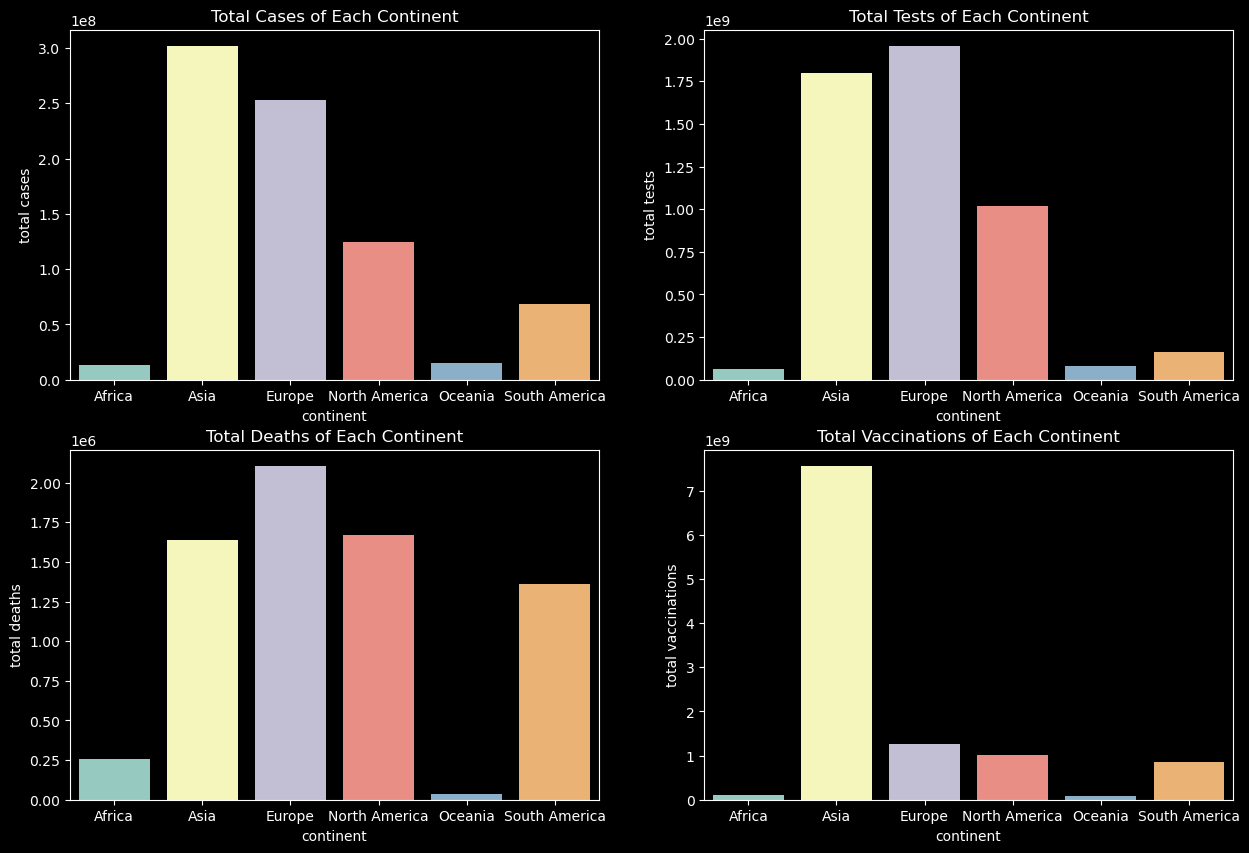

In [32]:
# Creating the plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(ax=axes[0,0], x = continents.index, y = continents['total cases'])
axes[0,0].set_title('Total Cases of Each Continent')

sns.barplot(ax=axes[0,1], x = continents.index, y = continents['total tests'])
axes[0,1].set_title('Total Tests of Each Continent')

sns.barplot(ax=axes[1,0], x = continents.index, y = continents['total deaths'])
axes[1,0].set_title('Total Deaths of Each Continent')

sns.barplot(ax=axes[1,1], x = continents.index, y = continents['total vaccinations'])
axes[1,1].set_title('Total Vaccinations of Each Continent')

## % of Covid Patients in Hospital and % of the Hospitalized Patients are in the ICU
The hosp_patients and the icu_patients columns are the total patients for each day. To get the new patients a day, I need to subtract the total patients the day before from the current day, e.g. on 21-03-2020, I need to subtract hosp_patients on 20-03-2020 from the hosp_patients on 21-03-2020. The overall total is the sum of all positive new patients, which means I can impute the negative ones with 0 to not count them towards the overall total.

In [41]:
# Creating the dataframe
df = pd.DataFrame()
df['country'] = covid['country']
df['new_cases'] = covid['new_cases']
df['hosp_today'] = covid['hosp_patients']
df['hosp_yesterday'] = covid['hosp_patients']
df['icu_today'] = covid['icu_patients']
df['icu_yesterday'] = covid['icu_patients']

# Adding an extra row to fit the length of yesterday column
df.loc[len(df.index)] = 0.0

# Pushing the yesterday column down by 1 row so that the data of the yesterday column is 1 day before the data of the today column. E.g. the data for the 21-03-2020 (today column) is on the same row as the data for the 20-03-2020 (yesterday column)
x = list(covid['hosp_patients'])
x.insert(0,0)
df['hosp_yesterday'] = x

x = list(covid['icu_patients'])
x.insert(0,0)
df['icu_yesterday'] = x

df

,country,new_cases,hosp_today,hosp_yesterday,icu_today,icu_yesterday
0,Afghanistan,0.0,0.0,0,0.0,0
1,Afghanistan,0.0,0.0,0,0.0,0
2,Afghanistan,0.0,0.0,0,0.0,0
3,Afghanistan,0.0,0.0,0,0.0,0
4,Afghanistan,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...
426552,Zimbabwe,0.0,0.0,0,0.0,0
426553,Zimbabwe,0.0,0.0,0,0.0,0
426554,Zimbabwe,0.0,0.0,0,0.0,0
426555,Zimbabwe,0.0,0.0,0,0.0,0


Checking if the first hosp_today and icu_today record for each country doesn't start at 0

In [36]:
df.drop_duplicates(['country']).sort_values('hosp_today', ascending = False).head(5)

,country,date,new_cases,hosp_today,hosp_yesterday,icu_today,icu_yesterday
108390,England,2020-03-20 00:00:00,0.0,1580.0,0,0.0,0
417006,Wales,2020-04-01 00:00:00,0.0,483.0,0,100.0,0
281814,Northern Ireland,2020-03-10 00:00:00,0.0,1.0,0,0.0,0
274455,Niue,2020-01-05 00:00:00,0.0,0.0,0,0.0,0
276122,North America,2020-01-05 00:00:00,0.0,0.0,0,0.0,0


In [37]:
df.drop_duplicates(['country']).sort_values('icu_today', ascending = False).head(5)

,country,date,new_cases,hosp_today,hosp_yesterday,icu_today,icu_yesterday
417006,Wales,2020-04-01 00:00:00,0.0,483.0,0,100.0,0
0,Afghanistan,2020-01-05 00:00:00,0.0,0.0,0,0.0,0
294869,Panama,2020-01-05 00:00:00,0.0,0.0,0,0.0,0
274455,Niue,2020-01-05 00:00:00,0.0,0.0,0,0.0,0
276122,North America,2020-01-05 00:00:00,0.0,0.0,0,0.0,0


There appears to be 3 countries which their first record doesn't start with 0.  If the last record of the previous country is 1 or more and the first record of the country is 1, the subtraction will result in 0 new patients making the overall total 1 less patient. If the first record of the country is 0, then the new patients will be 0 after the imputation regardless of the previous country's last record.

In [42]:
# Adding an all-zero row before the first record of these countries so that the first new patients record stays the same after subtraction
df.loc[df[df['country'] == 'England'].reset_index()['index'][0]-0.5] = ['England', 0.0, 0.0, 0.0, 0.0, 0.0]
df.loc[df[df['country'] == 'Wales'].reset_index()['index'][0]-0.5] = ['Wales', 0.0, 0.0, 0.0, 0.0, 0.0]
df.loc[df[df['country'] == 'Northern Ireland'].reset_index()['index'][0]-0.5] = ['Northern Ireland', 0.0, 0.0, 0.0, 0.0, 0.0]
df.sort_index(inplace = True)
df.reset_index(drop=True, inplace = True)

df.drop_duplicates(['country']).sort_values('hosp_today', ascending = False).head(3)

,country,new_cases,hosp_today,hosp_yesterday,icu_today,icu_yesterday
0,Afghanistan,0.0,0.0,0.0,0.0,0.0
1667,Africa,0.0,0.0,0.0,0.0,0.0
274456,Niue,0.0,0.0,0.0,0.0,0.0


Creating the new_hosp_patients and new_icu_patients columns by subtracting the yesterday column from the today column and impute the negative with 0.

In [51]:
# Subrtraction
df['new_hosp_patients'] = df['hosp_today'] - df['hosp_yesterday']
df['new_icu_patients'] = df['icu_today'] - df['icu_yesterday']

# Imputation
df['new_hosp_patients'] = df['new_hosp_patients'].clip(lower=0)
df['new_icu_patients'] = df['new_icu_patients'].clip(lower=0)

df

,country,new_cases,hosp_today,hosp_yesterday,icu_today,icu_yesterday,new_hosp_patients,new_icu_patients
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
426555,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426556,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426557,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426558,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the overall total hosp_patients and icu_patients and also the percentage of covid patients in hospital and percentage of the hospitalized patients are in the ICU.

In [44]:
# Overall total of each country
x = df.groupby('country').agg({'new_cases' : sum, 'new_hosp_patients' : sum, 'new_icu_patients' : sum})
x.rename(columns = {'new_cases' : 'total_cases', 'new_hosp_patients' : 'total_hosp_patients', 'new_icu_patients' : 'total_icu_patients'}, inplace = True)
x = x.apply(pd.to_numeric)

# Percentage
x['% of hospitalized'] = x['total_hosp_patients']/x['total_cases']*100
x['% of icu'] = x['total_icu_patients']/x['total_hosp_patients']*100

x.replace(float('inf'), 0, inplace = True)
hosp = x.sort_values('% of hospitalized', ascending = False).head(5)
icu = x.sort_values('% of icu', ascending = False).head(5)
icu

,total_cases,total_hosp_patients,total_icu_patients,% of hospitalized,% of icu
country,,,,,
Romania,3536986.0,74117.0,64266.0,2.095485,86.708852
Estonia,610471.0,4919.0,2243.0,0.805771,45.598699
Luxembourg,393352.0,1926.0,503.0,0.489638,26.116303
Slovenia,1356433.0,5450.0,1261.0,0.401789,23.137615
United States,103436829.0,552331.0,103680.0,0.533979,18.771353


Turning the data into charts.

Text(0.5, 1.0, '% of Hospital Patients in ICU')

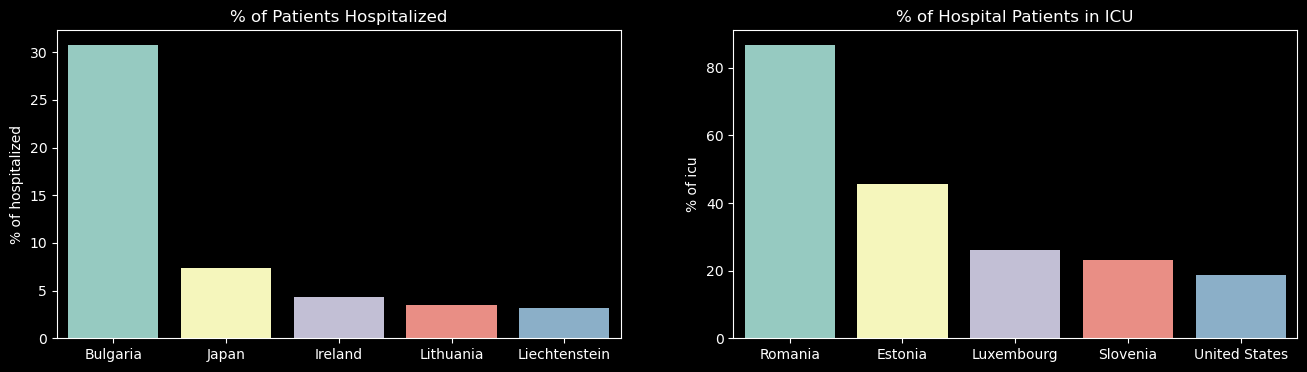

In [52]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.barplot(data = hosp, x = list(hosp.index), y = '% of hospitalized')
plt.title('% of Patients Hospitalized')

plt.subplot(122)
sns.barplot(data = icu, x = list(icu.index), y = '% of icu')
plt.title('% of Hospital Patients in ICU')

## Correlation of Columns
I'm finding the correlation between a few of the columns with each other.

In [53]:
latest = covid.sort_values('date', ascending=False).drop_duplicates('country')

data = latest[['total_cases', 'total_deaths', 'icu_patients', 'hosp_patients', 'total_tests', 'total_vaccinations', 'total_boosters', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'life_expectancy', 'human_development_index']].corr()
data

,total_cases,total_deaths,icu_patients,hosp_patients,total_tests,total_vaccinations,total_boosters,stringency_index,population,population_density,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
total_cases,1.000000,0.844450,-0.018974,-0.025076,-0.016200,-0.036229,-0.035266,NaN,0.098453,-0.031394,...,0.167810,0.123296,-0.096116,-0.101496,-0.035917,0.128579,0.095739,-0.105555,-0.087060,0.085338
total_deaths,0.844450,1.000000,-0.016744,-0.022128,-0.014295,-0.031971,-0.031121,NaN,0.066192,-0.037600,...,0.048892,0.039414,-0.077515,-0.100450,-0.064209,0.075250,0.008673,-0.062646,-0.186315,0.000283
icu_patients,-0.018974,-0.016744,1.000000,0.575522,-0.004611,-0.010313,-0.010039,NaN,-0.008505,-0.007462,...,0.175723,0.065077,-0.024053,-0.043866,-0.031665,0.095009,0.028419,-0.044662,0.029112,0.059810
hosp_patients,-0.025076,-0.022128,0.575522,1.000000,-0.006094,-0.013629,-0.013267,NaN,-0.011053,-0.015298,...,0.043018,-0.006342,-0.037628,-0.100310,-0.088289,0.014395,-0.040295,-0.059023,-0.161598,-0.056403
total_tests,-0.016200,-0.014295,-0.004611,-0.006094,1.000000,-0.008805,-0.008571,NaN,-0.012079,-0.012487,...,-0.042277,-0.047273,-0.027297,-0.082857,-0.077814,-0.039956,-0.061006,-0.038130,0.007630,-0.099278
total_vaccinations,-0.036229,-0.031971,-0.010313,-0.013629,-0.008805,1.000000,0.984865,NaN,0.969817,-0.024320,...,-0.074256,-0.065552,-0.021081,-0.099854,-0.087588,-0.056958,-0.043525,0.018449,-0.257155,-0.105076
total_boosters,-0.035266,-0.031121,-0.010039,-0.013267,-0.008571,0.984865,1.000000,NaN,0.943943,-0.025170,...,-0.075369,-0.064587,-0.029399,-0.107926,-0.096154,-0.055681,-0.047058,0.007237,-0.267248,-0.112100
stringency_index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
population,0.098453,0.066192,-0.008505,-0.011053,-0.012079,0.969817,0.943943,NaN,1.000000,-0.031322,...,-0.075631,-0.071677,-0.024224,-0.102296,-0.096056,-0.064066,-0.025992,0.018290,-0.287377,-0.103975
population_density,-0.031394,-0.037600,-0.007462,-0.015298,-0.012487,-0.024320,-0.025170,NaN,-0.031322,1.000000,...,-0.002782,0.276729,-0.056524,-0.155741,-0.020096,-0.062203,-0.077308,-0.071689,0.123907,-0.095265


<AxesSubplot:>

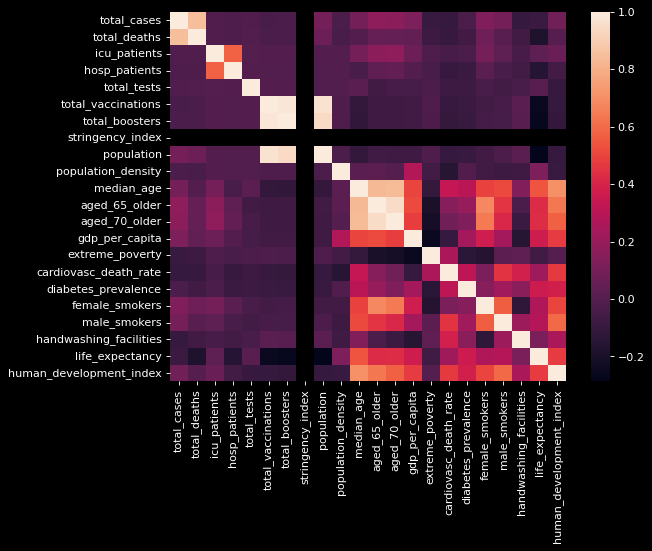

In [54]:
figure(figsize=(8, 6), dpi=80)
sns.heatmap(data)

## Countries with the Highest Contribution of a column (total cases, etc) to Their Continent

In [55]:
col = 'total_cases'  # You can change the column

# Creating the general dataframe
def continent(continent, top):
    df = pd.DataFrame(covid.groupby(['continent', 'country'])[col].agg(sum))
    df.reset_index(inplace = True)
    df = df[df['continent'] != 0]
    df['continent_' + col] = df.groupby('continent')[col].transform(sum)
    df['% of contribution'] = df[col]/df['continent_' + col]*100  # Contribution of each countries to the continent total
    
    cont = df[df['continent'] == continent].sort_values('% of contribution', ascending = False).head(top)
    cont.loc[len(cont.index)] = ['', 'Others','','', 100-sum(cont['% of contribution'])]
    return cont


# Dividing the countries to their respective continents and select only the top few to prevent messy charts. The rest of the countries are grouped into 'others'
africa = continent('Africa', 15)
asia = continent('Asia', 10)
europe = continent('Europe', 14)
north = continent('North America', 4)
south = continent('South America', 5)
ocean = continent('Oceania', 4)

africa

,continent,country,total_cases,continent_total_cases,% of contribution
60,Africa,South Africa,4662807361,14524864747,32.102243
47,Africa,Morocco,1445686842,14524864747,9.953186
65,Africa,Tunisia,1225014153,14524864747,8.433911
27,Africa,Egypt,594045176,14524864747,4.089850
31,Africa,Ethiopia,573359185,14524864747,3.947432
40,Africa,Libya,563720332,14524864747,3.881071
52,Africa,Reunion,438056531,14524864747,3.015908
37,Africa,Kenya,394409406,14524864747,2.715408
68,Africa,Zambia,371184289,14524864747,2.555509
15,,Others,,,17.061379


Creating the Charts

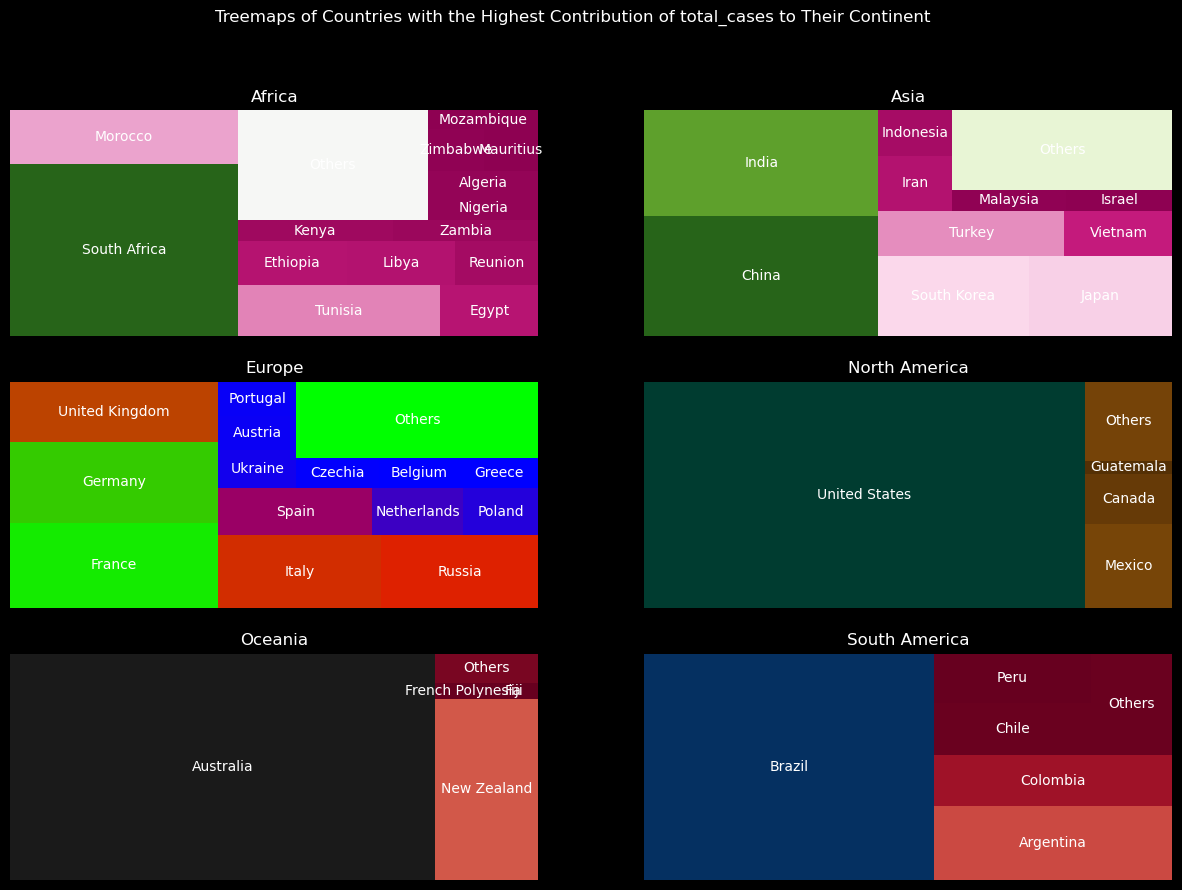

In [56]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Treemaps of Countries with the Highest Contribution of {} to Their Continent'.format(col))


# Customizing the color palette
def colorpalette(continent, palette):
    cmap = palette
    mini = min(continent['% of contribution'])
    maxi = max(continent['% of contribution'])
    norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
    colors = [cmap(norm(value)) for value in continent['% of contribution']]
    return colors


# Creating the treemaps
squarify.plot(ax = axes[0,0], sizes = africa['% of contribution'], label = africa['country'],
              color = colorpalette(africa, matplotlib.cm.PiYG))
axes[0,0].set_title('Africa')
axes[0,0].axis('off')


squarify.plot(ax = axes[0,1], sizes = asia['% of contribution'], label = asia['country'],
              color = colorpalette(asia, matplotlib.cm.PiYG))
axes[0,1].set_title('Asia')
axes[0,1].axis('off')


squarify.plot(ax = axes[1,0], sizes = europe['% of contribution'], label = europe['country'],
              color = colorpalette(europe, matplotlib.cm.brg))
axes[1,0].set_title('Europe')
axes[1,0].axis('off')


squarify.plot(ax = axes[1,1], sizes = north['% of contribution'], label = north['country'],
              color = colorpalette(north, matplotlib.cm.BrBG))
axes[1,1].set_title('North America')
axes[1,1].axis('off')


squarify.plot(ax = axes[2,0], sizes = ocean['% of contribution'], label = ocean['country'],
              color = colorpalette(ocean, matplotlib.cm.RdGy))
axes[2,0].set_title('Oceania')
axes[2,0].axis('off')


squarify.plot(ax = axes[2,1], sizes = south['% of contribution'], label = south['country'],
              color = colorpalette(south, matplotlib.cm.RdBu))
axes[2,1].set_title('South America')
axes[2,1].axis('off')

plt.show()